In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

In [2]:
!pwd

/home/vignesh/PCB_Segmentation


In [3]:
coco = COCO('train/_annotations.coco.json')
img_dir = 'train/'
image_id = 74

img = coco.imgs[image_id]


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


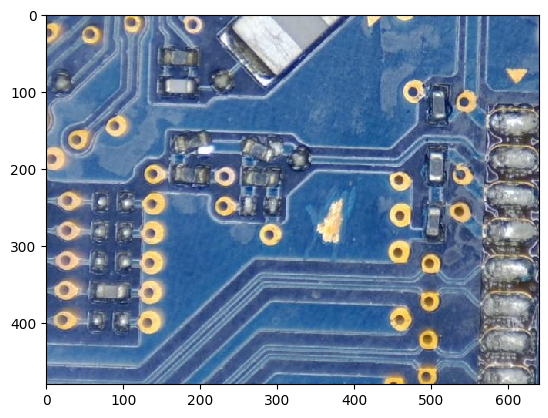

In [4]:
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

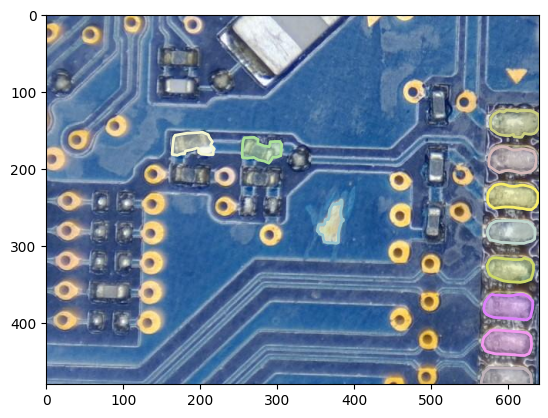

In [5]:
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

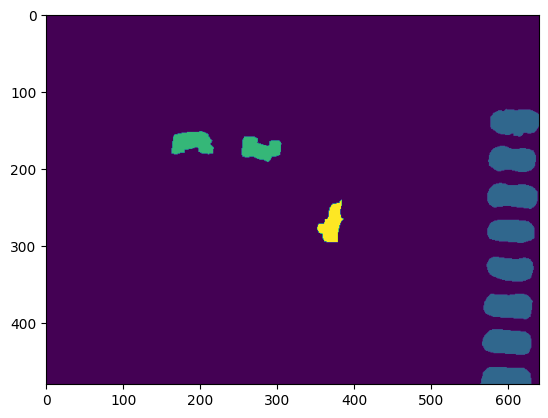

In [6]:
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
plt.imshow(anns_img)

In [13]:
def generate_masks(coco, img_dir, save_dir):
    cat_ids = coco.getCatIds()
    for img in coco.imgs.values():
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        anns_img = np.zeros((img['height'],img['width']))
        for ann in anns:
            anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])
        cv2.imwrite(os.path.join(save_dir, img['file_name']), anns_img)

In [14]:
# Generate Train Masks
coco = COCO('train/_annotations.coco.json')
img_dir = 'train/'
save_dir = 'train_masks/'
generate_masks(coco, img_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [15]:
# Generate Validation Masks
coco = COCO('valid/_annotations.coco.json')
img_dir = 'valid/'
save_dir = 'valid_masks/'
generate_masks(coco, img_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [16]:
# Generate Test Masks
coco = COCO('test/_annotations.coco.json')
img_dir = 'test/'
save_dir = 'test_masks/'
generate_masks(coco, img_dir, save_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
